# Pandas Data Visualization


Feng Li

School of Statistics and Mathematics

Central University of Finance and Economics

[feng.li@cufe.edu.cn](mailto:feng.li@cufe.edu.cn)

[https://feng.li/python](https://feng.li/python)

## Plot within Pandas

Pandas provide the basics in pandas to easily create decent looking plots. This section demonstrates visualization through charting. Pandas uses the standard convention for referencing the `matplotlib` API. You have to install `matplotlib` first before you use:

```sh
pip3 install matplotlib --user
```

In [2]:
import matplotlib.pyplot as plt
import pandas as pd


### Basic plotting: plot

- The plot method on `Series` and `DataFrame` is just a simple wrapper around `plt.plot()`:

<AxesSubplot:>

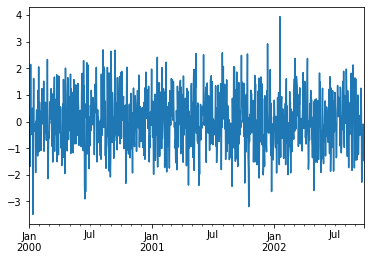

In [6]:
import numpy as np
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts.plot()

- On DataFrame, plot() is a convenience to plot all of the columns with labels:

In [47]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list("ABCD"))
df

,A,B,C,D
2000-01-01,0.150646,-0.287093,0.177943,0.525221
2000-01-02,-0.383390,-0.488874,-1.085581,0.790646
2000-01-03,0.483924,-1.843178,-0.468087,-0.036796
2000-01-04,-0.243701,-0.294244,0.486281,-0.681788
2000-01-05,0.337589,0.968864,0.878702,1.268070
...,...,...,...,...
2002-09-22,-0.127965,-0.036267,-0.013937,-0.945945
2002-09-23,-0.077905,1.380460,-0.235105,-0.575233
2002-09-24,-0.087099,0.274607,0.503917,-1.233950
2002-09-25,-0.205177,1.257540,-1.425778,-0.298746


<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

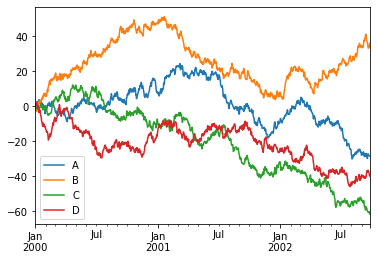

In [48]:
df = df.cumsum()
plt.figure()
df.plot()

- To plot data on a secondary y-axis, use the `secondary_y` keyword:

<Figure size 432x288 with 0 Axes>

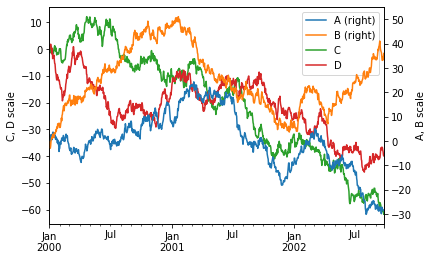

In [55]:
plt.figure();
ax = df.plot(secondary_y=["A", "B"])
ax.set_ylabel("C, D scale");
ax.right_ax.set_ylabel("A, B scale");

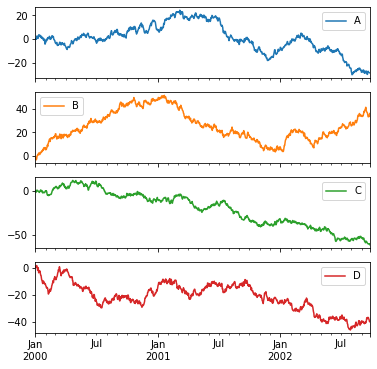

In [57]:
df.plot(subplots=True, figsize=(6, 6));

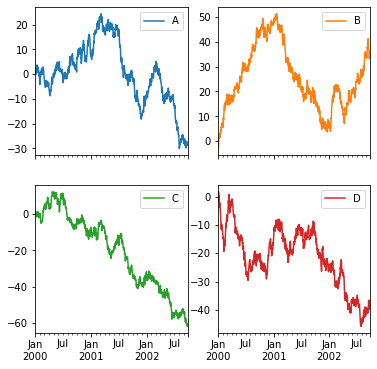

In [60]:
df.plot(subplots=True, layout=(2, 2), figsize=(6, 6), sharex=True);

- You can plot one column versus another using the `x` and `y` keywords in `plot()`:

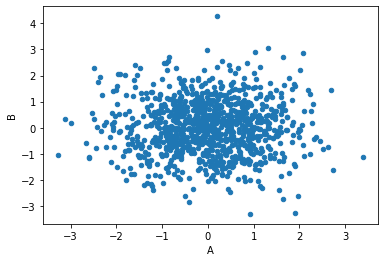

In [11]:
df.plot(x="A", y="B", kind="scatter");

- Plotting methods allow for a handful of plot styles other than the default line plot. These methods can be provided as the kind keyword argument to plot(), and include:

    - `bar` or `barh` for bar plots

    - `hist` for histogram

    - `box` for boxplot

    - `kde` or `density` for density plots

    - `area` for area plots

    - `scatter` for scatter plots

    - `hexbin` for hexagonal bin plots

    - `pie` for pie plots

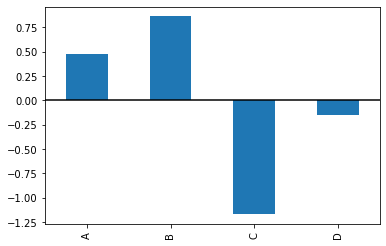

In [12]:
plt.figure()
df.iloc[5].plot.bar()
plt.axhline(0, color="k")

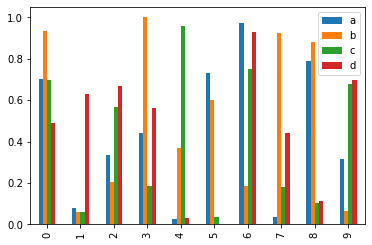

In [13]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=["a", "b", "c", "d"])
df2.plot.bar();

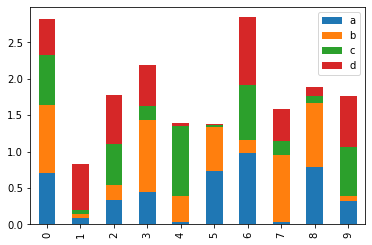

In [14]:
df2.plot.bar(stacked=True);

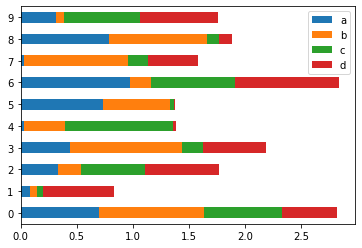

In [15]:
df2.plot.barh(stacked=True);

- Boxplot can be drawn calling `Series.plot.box()` and `DataFrame.plot.box()`, or `DataFrame.boxplot()` to visualize the distribution of values within each column.



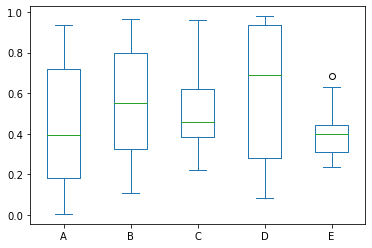

In [16]:
df4 = pd.DataFrame(np.random.rand(10, 5), columns=["A", "B", "C", "D", "E"])

df4.plot.box();

## Area plot

- You can create area plots with `Series.plot.area()` and `DataFrame.plot.area()`. Area plots are stacked by default. To produce stacked area plot, each column must be either all positive or all negative values.

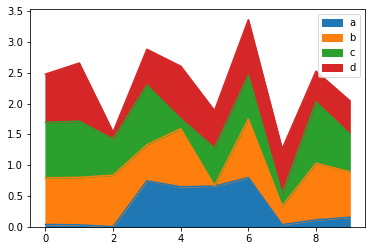

In [17]:
df5 = pd.DataFrame(np.random.rand(10, 4), columns=["a", "b", "c", "d"])

df5.plot.area();

- To produce an unstacked plot, pass `stacked=False`. Alpha value is set to 0.5 unless otherwise specified:

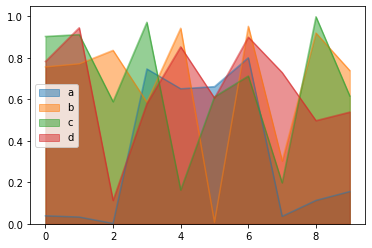

In [19]:
df5.plot.area(stacked=False);

## Scatter plot

- Scatter plot can be drawn by using the `DataFrame.plot.scatter()` method. Scatter plot requires numeric columns for the `x` and `y` axes. These can be specified by the `x` and `y` keywords.

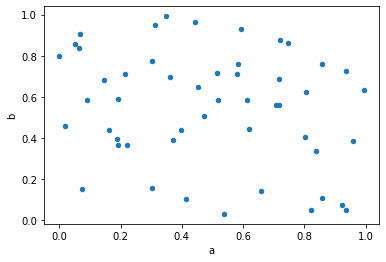

In [20]:
df = pd.DataFrame(np.random.rand(50, 4), columns=["a", "b", "c", "d"])
df["species"] = pd.Categorical(
    ["setosa"] * 20 + ["versicolor"] * 20 + ["virginica"] * 10)
df.plot.scatter(x="a", y="b");

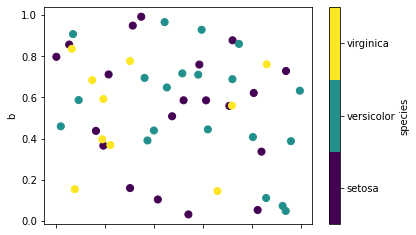

In [22]:
# The keyword c may be given as the name of a column to provide colors for each point:
df.plot.scatter(x="a", y="b", c="species", cmap="viridis", s=50);

## Hexagonal bin plot

- You can create hexagonal bin plots with `DataFrame.plot.hexbin()`. Hexbin plots can be a useful alternative to scatter plots if your data are too dense to plot each point individually.

In [31]:
df = pd.DataFrame(np.random.randn(10000, 2), columns=["a", "b"])
df["b"] = df["b"] + np.arange(10000)

<AxesSubplot:xlabel='a', ylabel='b'>

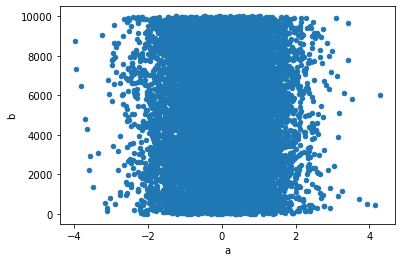

In [32]:
df.plot.scatter(x="a", y="b") # bad scatter plot without hexbin

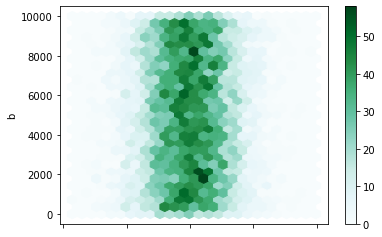

In [29]:
df.plot.hexbin(x="a", y="b", gridsize=25);

## Andrews curves

Andrews curves allow one to plot multivariate data as a large number of curves that are created using the attributes of samples as coefficients for Fourier series, see the Wikipedia entry for more information. By coloring these curves differently for each class it is possible to visualize data clustering. Curves belonging to samples of the same class will usually be closer together and form larger structures.



In [42]:
iris = pd.read_csv("data/iris.csv")
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


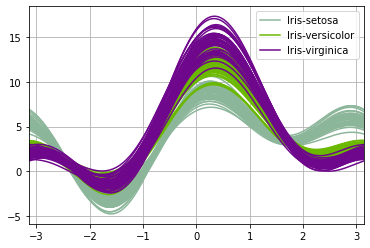

In [45]:
from pandas.plotting import andrews_curves
plt.figure()
andrews_curves(iris, "Name");

## Parallel coordinates

- Parallel coordinates is a plotting technique for plotting multivariate data. 

- Parallel coordinates allows one to see clusters in data and to estimate other statistics visually. Using parallel coordinates points are represented as connected line segments. 

- Each vertical line represents one attribute. One set of connected line segments represents one data point. Points that tend to cluster will appear closer together.


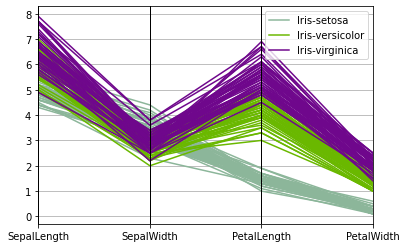

In [62]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(iris, "Name");